In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
data = pd.read_csv('Kinematics_Data.csv')

In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import lightgbm as lgb

In [4]:
data

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...,...,...,...
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


In [5]:
X = data.iloc[:, 5:]

In [6]:
X

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...
88583,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


In [7]:
Y1 = data['wrist']
Y2 = data['activity']

# EDA

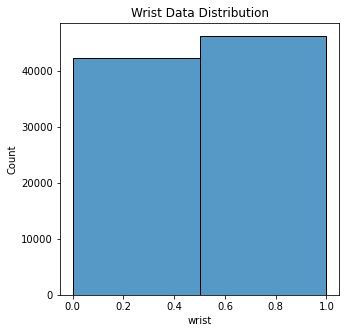

Wrist Label Count
Counter({1: 46258, 0: 42330})


In [8]:
plt.figure(figsize=(5,5))
sns.histplot(Y1, bins=2)
plt.title('Wrist Data Distribution')
plt.show()

print('Wrist Label Count')
print(Counter(Y1))

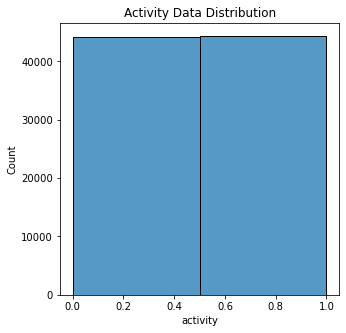

Activity Label Count
Counter({1: 44365, 0: 44223})


In [9]:
plt.figure(figsize=(5,5))
sns.histplot(Y2, bins=2)
plt.title('Activity Data Distribution')
plt.show()

print('Activity Label Count')
print(Counter(Y2))

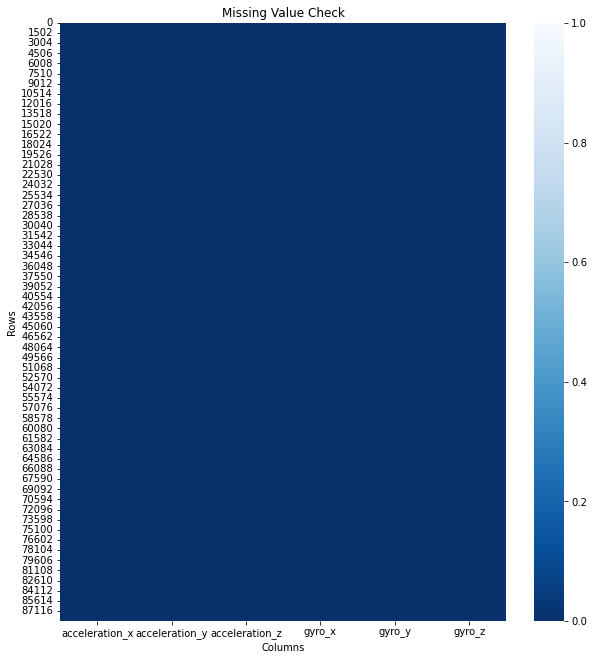

In [10]:
#Missing Value Check
plt.figure(figsize=(10,11))
sns.heatmap(data.iloc[:,5:].isnull(), vmax=1, vmin=0, cmap='Blues_r')
plt.title('Missing Value Check')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [11]:
X.corr(method='pearson')

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
acceleration_x,1.000000,-0.265169,-0.552374,-0.021705,-0.004091,-0.060849
acceleration_y,-0.265169,1.000000,0.106220,0.010549,0.072170,-0.022994
acceleration_z,-0.552374,0.106220,1.000000,0.035296,-0.021004,0.049621
gyro_x,-0.021705,0.010549,0.035296,1.000000,0.094011,0.317769
gyro_y,-0.004091,0.072170,-0.021004,0.094011,1.000000,0.287244
gyro_z,-0.060849,-0.022994,0.049621,0.317769,0.287244,1.000000


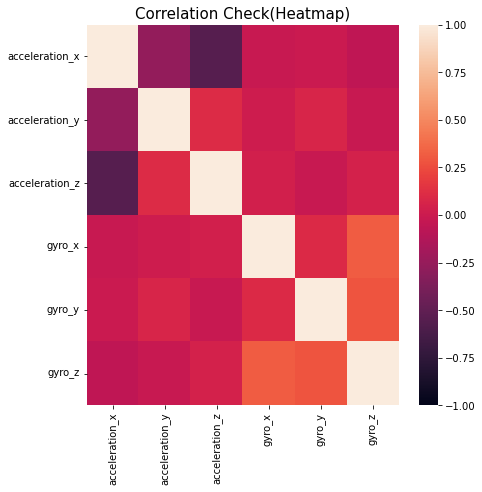

In [12]:
#Correlation Check
plt.figure(figsize=(7,7))
plt.title('Correlation Check(Heatmap)', fontsize = 15)
sns.heatmap(X.corr(method='pearson'), vmin=-1, vmax=1)
plt.show()

In [13]:
# 상자그림 (boxplot)

In [14]:
left_wrist = data[data['wrist']==0]
right_wrist = data[data['wrist']==1]

In [15]:
walking = data[data['activity']==0]
running = data[data['activity']==1]

In [16]:
f, (ax1, ax2) = plt.subplot(ncols=2, figsize=(15,5))

sns.displot(left_wrist.)

SyntaxError: invalid syntax (<ipython-input-16-51f0749f3bbc>, line 3)

# 차원축소

## 스케일링

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
data_temp = data.copy().iloc[:, 5:]
scaler = StandardScaler().fit(data_temp)
data_temp = pd.DataFrame(scaler.transform(data_temp), columns=data_temp.columns)
data_temp

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0.336683,-0.332316,0.629311,-0.050391,-0.003924,-1.541949
1,0.740133,-0.851562,0.163423,-0.143496,-0.013684,0.054624
2,0.509972,-1.395867,0.793235,-0.729734,0.057642,-1.284481
3,0.374432,-0.379548,0.827334,0.092339,-0.372984,-1.544039
4,0.551090,-0.559819,0.718668,0.038726,0.334271,1.290147
...,...,...,...,...,...,...
88583,0.379683,-0.417668,0.372333,0.381469,1.647757,0.304257
88584,0.567240,-0.668406,-0.258300,0.078218,-1.079239,-0.051414
88585,0.528599,-0.934636,0.064206,-1.160158,-0.263951,-0.670664
88586,0.330738,-0.448953,0.489011,-1.213213,0.349370,-0.939101


## 2차원 축소(PCA, TSNE)

In [18]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [19]:
cmap = ['blue', 'red']
colors = [cmap[x] for x in data['wrist']]

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_temp)

tsne = TSNE(n_components=2)
data_tsne = tsne.fit_transform(data_temp)

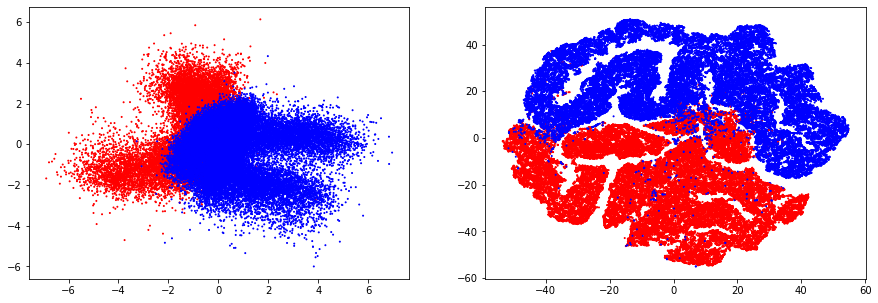

In [37]:
#f = 좌표계 리스트, (ax1, ax2) = 각 좌표계
f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

#scatter(x = x좌표계, y = y좌표계, s = 마커의 크기, colors = 색상)
ax1.scatter(data_pca[:,0], data_pca[:,1], s=1, color=colors)
ax2.scatter(data_tsne[:,0], data_tsne[:,1], s=1, color=colors)

## 3차원 축소 PCA

In [50]:
pca3D = PCA(n_components=3)
data_pca3D = pca3D.fit_transform(data_temp)

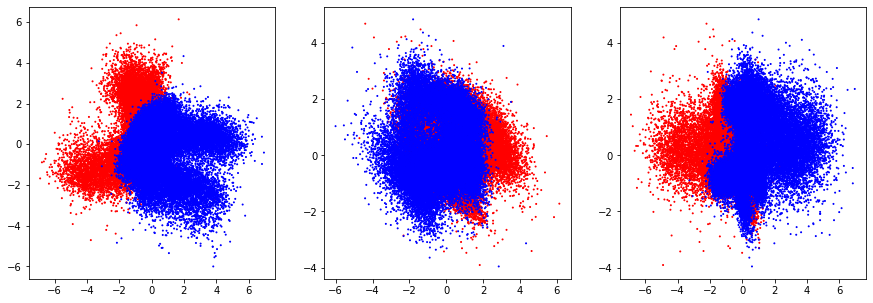

In [51]:
f_3d, (ax3d_1, ax3d_2, ax3d_3) = plt.subplots(ncols=3, figsize=(15,5))

ax3d_1.scatter(data_pca3D[:,0], data_pca3D[:,1], s=1, color=colors)
ax3d_2.scatter(data_pca3D[:,1], data_pca3D[:,2], s=1, color=colors)
ax3d_3.scatter(data_pca3D[:,0], data_pca3D[:,2], s=1, color=colors)
f_3d

## 3차원 축소 TSNE

In [52]:
tsne3D = TSNE(n_components=3)
data_tsne3D = tsne3D.fit_transform(data_temp)

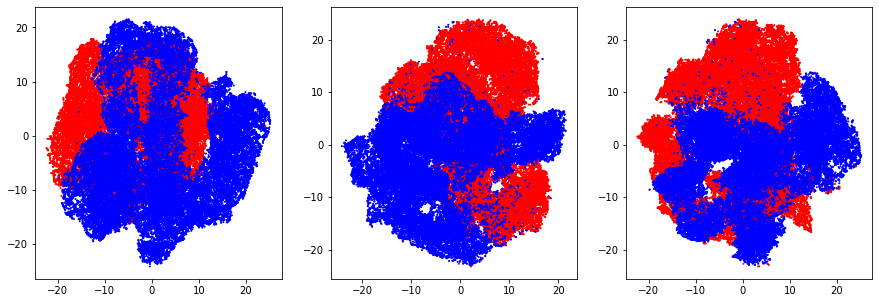

In [55]:
ft_3d, (axt3d_1, axt3d_2, axt3d_3) = plt.subplots(ncols=3, figsize=(15,5))

axt3d_1.scatter(data_tsne3D[:,0], data_tsne3D[:,1], s=1, color=colors)
axt3d_2.scatter(data_tsne3D[:,1], data_tsne3D[:,2], s=1, color=colors)
axt3d_3.scatter(data_tsne3D[:,0], data_tsne3D[:,2], s=1, color=colors)